# Neumann Hamiltonian

We consider the integrable Hamiltonian

$$
H = \frac{1}{4}\sum_{\alpha,\beta} J_{\alpha\beta}^2 + \frac{1}{2}\sum_\alpha k_\alpha x_\alpha^2
$$

with $J_\alpha\beta = x_\alpha p_\beta - x_\beta p_\alpha$ is the (generalized) angular momentum. The constants of motion are

$$
I_\alpha = x_\alpha^2 + \sum_{\beta\neq \alpha} \frac{J_{\alpha\beta}^2}{k_\alpha-k_\beta}
$$

for $k_\alpha$ all different. We have

$$
H = \sum_\alpha k_\alpha I_\alpha
$$

And

$$
\sum_\alpha x_\alpha^2 = \sum_\alpha I_\alpha,
$$

so that motion is confined to the sphere $S^{N-1}$.

## Equations of Motion

The equations of motion have Hamiltonian form

$$
\begin{align}
\dot p_\alpha &= \frac{\partial H}{\partial x_\alpha} = -k_\alpha x_\alpha-\sum_\beta \left[x_\alpha p_\beta-x_\beta p_\alpha\right]p_\beta\\
\dot x_\alpha &= -\frac{\partial H}{\partial p_\alpha} = \sum_\beta \left[p_\alpha x_\beta-p_\beta x_\alpha\right]x_\beta
\end{align}
$$

## Sample solution in TF

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
import matplotlib.pyplot as plt

In [2]:
N = 3 
ks = np.random.rand(N)

In [3]:
def neumann_equations(phase_space_point, t):
    xs, ps = tf.split(phase_space_point, num_or_size_splits=2)
    dps = - ks * xs
    dps += -xs * tf.reduce_sum(ps**2)
    dps += ps * tf.reduce_sum(xs * ps)
    dxs = ps * tf.reduce_sum(xs**2)
    dxs += - xs * tf.reduce_sum(xs * ps)
    return tf.concat([dxs, dps], axis=0)

In [4]:
init_state = tf.constant(np.random.rand(2*N), dtype=tf.float64)
t = np.linspace(0, 100, num=5000)
tensor_state, tensor_info = tf.contrib.integrate.odeint(
    neumann_equations, init_state, t, full_output=True)

sess = tf.Session()
state, info = sess.run([tensor_state, tensor_info])
x, y, z, px, py, pz = state.T

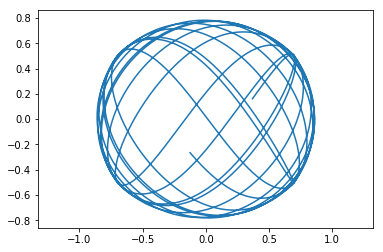

In [5]:
plt.axes().set_aspect('equal', 'datalim')
plt.plot(x, y)

## Check the integrals of motion

In [6]:
def Is(phase_space_point):
    xs, ps = np.split(phase_space_point, indices_or_sections=2)
    Is = xs**2 
    for α, _ in enumerate(Is):
        for β, _ in enumerate(Is):
            J = xs[α]*ps[β] - ps[α]*xs[β]
            if β != α:
                Is[α] += J**2 / (ks[α] - ks[β])
    return Is

In [7]:
I_traj = np.array([Is(point) for point in state])

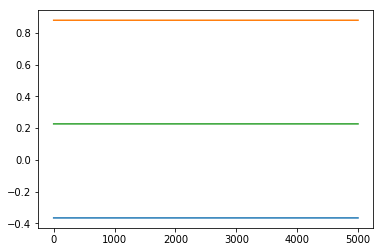

In [8]:
plt.plot(I_traj)

## Learning a Transformation